In [1]:
import pandas as pd
import mne
import sys
import platform
import os
import scipy.io

import numpy as np

if platform.system()=='Darwin':
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    #if this doesn't work pound line right above this, restart the kernel, rerun the cell. 
    #Then uncomment the same line and rerun

else:
    #os.chdir('Z:/BBC/WP1/data/EEG/tsk')
    sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')
from base.files_in_out import getListOfFiles,GetFiles

In [2]:
# check vep subject
g_num='g10'
epo_vep=mne.read_epochs(f'preproc/{g_num}/{g_num}_epochs/{g_num}_final/{g_num}_n_tsk_cfa_vep_clean_epo.fif')

Reading Z:\BBC\WP1\data\EEG\tsk\preproc\g10\g10_epochs\g10_final\g10_n_tsk_cfa_vep_clean_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Adding metadata with 40 columns
786 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\Vivi\AppData\Local\Temp\ipykernel_22772\568287729.py:2: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.evoked.EvokedArray'>.tmin (-0.199219 s)
  epo_vep[('vep/normal/correct')].average().crop(-0.3,0.6).plot(picks='A15')


Need more than one channel to make topography for eeg. Disabling interactivity.


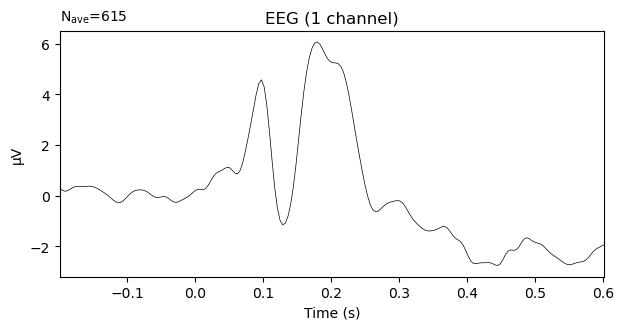

In [3]:
%matplotlib qt
epo_vep[('vep/normal/correct')].average().crop(-0.3,0.6).plot(picks='A15')

Reading Z:\BBC\WP1\data\EEG\tsk\preproc\g01\g01_epochs\g01_final\g01_n_tsk_cfa_hep_clean_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Adding metadata with 40 columns
1946 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\Vivi\AppData\Local\Temp\ipykernel_6284\3032453574.py:2: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  epo_hep[('hep/RRCA')].average().crop(-0.3,0.6).plot(picks='A15')


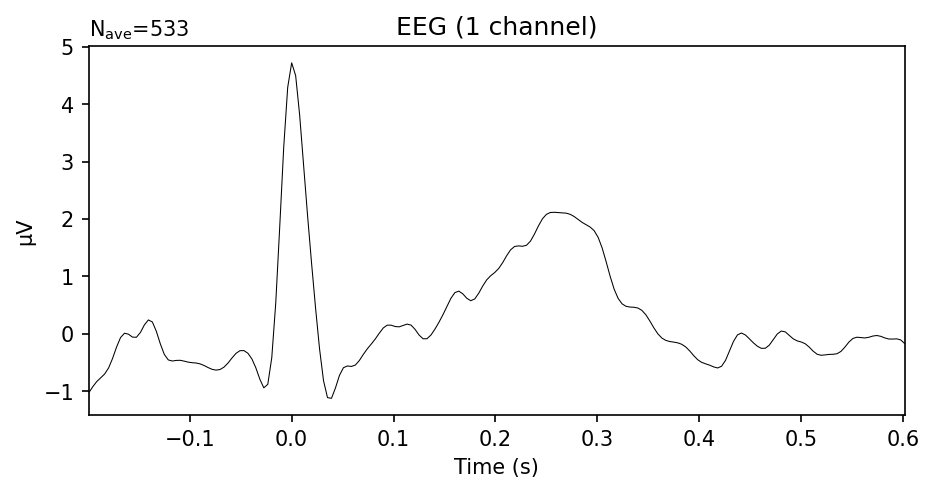

In [4]:
epo_hep=mne.read_epochs(f'preproc/{g_num}/{g_num}_epochs/{g_num}_final/{g_num}_n_tsk_cfa_hep_clean_epo.fif')
epo_hep[('hep/RRCA')].average().crop(-0.3,0.6).plot(picks='A15')

In [4]:
# Load your MNE Raw object (example)
raw = mne.io.read_raw_fif(f"raw/{g_num}/{g_num}_n_tsk_ICA_rec-raw.fif", preload=True)
# Extract the data (channels × time)
data = raw.get_data()  # Shape: (n_channels, n_times)
# Extract channel names and sampling rate
channel_names = raw.ch_names
sfreq = raw.info["sfreq"]

Opening raw data file raw/g10/g10_n_tsk_ICA_rec-raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Range : 0 ... 649983 =      0.000 ...  2538.996 secs
Ready.
Reading 0 ... 649983  =      0.000 ...  2538.996 secs...


In [75]:
#montage=mne.channels.make_standard_montage('biosemi128')
#raw.set_montage(montage)

<Raw | g10_n_tsk_ICA_rec-raw.fif, 131 x 649984 (2539.0 s), ~649.8 MB, data loaded>

In [5]:
#raw.drop_channels(['EXG1','Erg1','Status'])
annotations=raw.annotations
# Convert onsets from seconds to sample
sample_indices = np.round(annotations.onset * sfreq).astype(int)

In [6]:
raw.drop_channels(['EXG1','Erg1','Status'])

<Raw | g10_n_tsk_ICA_rec-raw.fif, 128 x 649984 (2539.0 s), ~634.9 MB, data loaded>

In [7]:
annot_df=annotations.to_data_frame()
annot_df

,onset,duration,description
0,2021-03-21 10:54:30.382812,0.000000,hep/normal/correct/unaware/R2/exh/RRCU
1,2021-03-21 10:54:30.629883,0.000000,hep/normal/correct/unaware/T/exh/no_val
2,2021-03-21 10:54:30.689453,0.000000,vep/normal/correct/unaware/sys/exh
3,2021-03-21 10:54:31.622070,0.000000,xns/normal/correct/unaware/sys/exh
4,2021-03-21 10:54:32.505859,0.000000,hep/easy/mistake/unaware/R2/exh/RRMU
...,...,...,...
3880,2021-03-21 11:36:27.692383,0.000000,hep/normal/correct/aware/R2/exh/RRCA
3881,2021-03-21 11:36:27.955078,0.000000,hep/normal/correct/aware/T/exh/no_val
3882,2021-03-21 11:36:28.086914,0.000000,vep/normal/correct/aware/dia/exh
3883,2021-03-21 11:36:28.895508,0.000000,xns/normal/correct/aware/dia/exh


In [8]:
for i, desc in enumerate(annotations.description):
    # Split the description into tags
    #tags = desc.split("/")
    if 'bad blink' in desc:
        print(desc)

In [9]:
# Parse the descriptions and filter/remap events
filtered_onsets = []
filtered_durations = []
filtered_descriptions = []

# Create event table
# Parse the descriptions and create the event table
event_data = {
    "time": [],  # Onset in seconds
    "event": [],  # Simplified event type ("hep" or "vep")
    "awareness": [],  # Awareness state ("aware" or "unaware")
    "duration": [],  # Duration in seconds
    "card_phase": [], # cardiac phase
    "rsp_phase":[],# rsp phase
}


for i, desc in enumerate(annotations.description):
    # Split the description into tags
    tags = desc.split("/")
    if "bad" in tags[0].lower():
        continue

    # Check if the event matches the stimulus criteria
    # Must contain "vep", "normal", "correct"
    if (
            "normal" in tags[1].lower() and  # Check for "normal" in the second tag
            "correct" in tags[2].lower()  # Check for "correct" in the third tag
    ):
        # Check for hep events with RRCA or RRCU
        if "hep" in tags[0].lower():
            if tags[-1] in ["RRCA", "RRCU"]:
                condition_name = "hep"  # Collapse RRCA and RRCU into "hep"
                awareness = "aware" if tags[-1] == "RRCA" else "unaware"
                card_phase='dia' if tags[-3]=='R2'else 'sys'
                rsp_phase='inh'if tags[-2]=='inh' else 'exh'
            else:
                continue  # Skip if not RRCA or RRCU
            filtered_onsets.append(annotations.onset[i])
            filtered_durations.append(annotations.duration[i])
            filtered_descriptions.append(condition_name)
            event_data["time"].append(annotations.onset[i])
            event_data["event"].append(condition_name)
            event_data["awareness"].append(awareness)
            event_data["duration"].append(annotations.duration[i])
            event_data["card_phase"].append(card_phase)
            event_data["rsp_phase"].append(rsp_phase)

        # Check for vep events with aware or unaware
        elif "vep" in tags[0].lower():
            if "aware" in tags[3].lower() or "unaware" in tags[3].lower():
                condition_name = "vep"  # Collapse aware and unaware into "vep"
                awareness = "unaware" if "unaware" in tags[3].lower() else "aware"
                card_phase='dia' if tags[-2]=='dia'else 'sys'
                rsp_phase='inh'if tags[-1]=='inh' else 'exh'
            else:
                continue  # Skip if not aware or unaware
            filtered_onsets.append(annotations.onset[i])
            filtered_durations.append(annotations.duration[i])
            filtered_descriptions.append(condition_name)
            event_data["time"].append(annotations.onset[i])
            event_data["event"].append(condition_name)
            event_data["awareness"].append(awareness)
            event_data["duration"].append(annotations.duration[i])
            event_data["card_phase"].append(card_phase)
            event_data["rsp_phase"].append(rsp_phase)


In [10]:
# Create a DataFrame from the event data
event_table = pd.DataFrame(event_data)
# Sort the event table by time (ensures chronological order)
event_table = event_table.sort_values(by="time").reset_index(drop=True)

# Save the event table to a CSV file
event_table.to_csv(f"ana/deconvolution/test/event_table_{g_num}.csv", index=False)


In [11]:
# Create a new Annotations object with the simplified conditions
new_annotations = mne.Annotations(
    onset=filtered_onsets,  # Onsets in seconds
    duration=filtered_durations,  # Durations in seconds
    description=filtered_descriptions  # Simplified descriptions ("hep" or "vep")
)

# Set the new annotations in the Raw object, replacing the old ones
new_raw=raw.copy()
new_raw.set_annotations(None)

new_raw.pick_types(eeg=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<Raw | g10_n_tsk_ICA_rec-raw.fif, 128 x 649984 (2539.0 s), ~634.9 MB, data loaded>

In [ ]:

# Save the Raw object to a .set file for EEGLAB
mne.export.export_raw(f"ana/deconvolution/test/eeg_data_{g_num}.set",raw=new_raw,overwrite=True)

In [26]:
import numpy as np
annots = new_raw.annotations
onsets = np.array(annots.onset)
durations = np.array(annots.duration)
descriptions = np.array(annots.description)
# Identify invalid (non-finite) onsets or durations
invalid_mask = ~np.isfinite(onsets) | ~np.isfinite(durations)
# Optionally: flag empty or non-string descriptions
invalid_mask |= [not isinstance(desc, str) or desc.strip() == '' for desc in descriptions]
# Get indices of problematic annotations
bad_indices = np.where(invalid_mask)[0]
# Print them out
print(f"\nFound {len(bad_indices)} problematic annotations:\n")
for idx in bad_indices:
    print(f"[{idx}] Onset: {onsets[idx]}, Duration: {durations[idx]}, Description: {descriptions[idx]}")
if len(bad_indices) == 0:
    print(" No problematic annotations found!")



Found 0 problematic annotations:

 No problematic annotations found!


In [30]:
from mne.export._eeglab import _get_als_coords_from_chs
from eeglabio.raw import export_set
# Dummy filename — we won't save yet
fname = "ana/deconvolution/test/test_output.set"
# Get EEG channel names and locations
ch_names = new_raw.ch_names
ch_locs = _get_als_coords_from_chs(new_raw.info['chs'], drop_chs=[])
# Extract annotations for manual check
annotations = [new_raw.annotations.description[:100],
               new_raw.annotations.onset[:100],
               new_raw.annotations.duration[:100]]
print("Descriptions shape:", np.array(annotations[0]).shape)
print("Onsets shape:", np.array(annotations[1]).shape)
print("Durations shape:", np.array(annotations[2]).shape)

Descriptions shape: (100,)
Onsets shape: (100,)
Durations shape: (100,)


In [41]:
import numpy as np
from scipy.io import savemat
def safe_export_set(raw, fname, n_events=None):
    sfreq = raw.info['sfreq']
    ch_names = raw.ch_names
    data = raw.get_data()
    if n_events is None:
        n_events = len(raw.annotations)
    desc = np.array([str(d) for d in raw.annotations.description[:n_events]], dtype='U20')
    latency = (raw.annotations.onset[:n_events] * sfreq + 1).astype(np.float64)
    duration = (raw.annotations.duration[:n_events] * sfreq).astype(np.float64)
    event = np.rec.fromarrays([desc, latency, duration],
                              names=["type", "latency", "duration"])
    eeg_d = {
        'data': data,
        'srate': sfreq,
        'nbchan': raw.info['nchan'],
        'trials': 1,
        'pnts': data.shape[1],
        'event': event,
        'chanlocs': [],  # optional: fill in if needed
        'chanlabels': ch_names,
    }
    for key, val in eeg_d.items():
        print(f"{key}: type={type(val)}, dtype={getattr(val, 'dtype', 'NA')}, shape={getattr(val, 'shape', 'NA')}")
    savemat(fname, eeg_d, appendmat=False)
    print(f"Exported to {fname} successfully")

In [11]:
def safe_export_set(raw, fname, n_events=None):
    import numpy as np
    from scipy.io import savemat
    from mne.export._eeglab import _get_als_coords_from_chs
    ch_locs = _get_als_coords_from_chs(raw.info['chs'], drop_chs=[])
    sfreq = raw.info['sfreq']
    ch_names = raw.ch_names
    data = raw.get_data().astype(np.float64)
    if n_events is None:
        n_events = len(raw.annotations)
    desc = np.array([str(d) for d in raw.annotations.description[:n_events]], dtype='U20')
    latency = (raw.annotations.onset[:n_events] * sfreq + 1).astype(np.float64)
    duration = (raw.annotations.duration[:n_events] * sfreq).astype(np.float64)
    event = np.rec.fromarrays([desc, latency, duration],
                              names=["type", "latency", "duration"])

    eeg_d = {
        'data': data,
        'srate': sfreq,
        'nbchan': raw.info['nchan'],
        'trials': 1,
        'pnts': raw.n_times,
        'event': event,
        'chanlabels': np.array(ch_names, dtype='U20')  #  proper format
        #'chanlocs': ch_locs # optionally fill later,
    }
    savemat(fname, eeg_d, appendmat=False)
    print(f"Exported to {fname} successfully")

In [12]:
safe_export_set(new_raw, f"ana/deconvolution/test/eeg_data_{g_num}_SAFE.set")

OSError: [Errno 22] Invalid argument

In [63]:
vcraw.info['chs'][0]['loc']

array([0.        , 0.        , 0.13514873, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [59]:
import numpy as np
def check_chanlocs(raw):
    # Initialize a report
    report = {
        "missing_channels": [],
        "nan_coordinates": [],
        "invalid_channels": [],
        "incorrect_dim": [],
        "extra_elements": []
    }
    # Check each channel's location information
    for idx, ch in enumerate(raw.info['chs']):
        loc = ch['loc']  # Channel location (should be a 4-element array, [X, Y, Z, 1])
        # Check if location is None or contains NaNs
        if loc is None or np.any(np.isnan(loc[:3])):  # Check if any X, Y, Z are NaN
            report["missing_channels"].append(ch['ch_name'])
            report["nan_coordinates"].append({
                'channel': ch['ch_name'],
                'X': loc[0] if len(loc) > 0 else None,
                'Y': loc[1] if len(loc) > 1 else None,
                'Z': loc[2] if len(loc) > 2 else None
            })
        # Check if the dimensions of the loc array are correct (should be 4)
        if len(loc) != 4:
            report["incorrect_dim"].append({
                'channel': ch['ch_name'],
                'loc_length': len(loc)
            })
        # Check if there are any extra elements (should only be [X, Y, Z, 1])
        if len(loc) > 4:
            report["extra_elements"].append({
                'channel': ch['ch_name'],
                'loc': loc
            })
        # Optionally, check if the coordinates are outside a reasonable range
        if np.any(np.abs(loc[:3]) > 500):  # Arbitrary threshold of 500 mm for location range
            report["invalid_channels"].append({
                'channel': ch['ch_name'],
                'coordinates': loc[:3]
            })
    return report
# Example usage:
report = check_chanlocs(new_raw)
# Print the report
if not report["missing_channels"] and not report["nan_coordinates"] and not report["invalid_channels"] and not report["incorrect_dim"] and not report["extra_elements"]:
    print("All channel locations are fine!")
else:
    print("Issues with channel locations:")
    if report["missing_channels"]:
        print(f"  Missing locations for channels: {', '.join(report['missing_channels'])}")
    if report["nan_coordinates"]:
        print(f"  Channels with NaN coordinates: {report['nan_coordinates']}")
    if report["invalid_channels"]:
        print(f"  Channels with invalid coordinates (out of range): {report['invalid_channels']}")
    if report["incorrect_dim"]:
        print(f"  Channels with incorrect dimensions (not 4 elements): {report['incorrect_dim']}")
    if report["extra_elements"]:
        print(f"  Channels with extra elements in 'loc': {report['extra_elements']}")

Issues with channel locations:
  Channels with incorrect dimensions (not 4 elements): [{'channel': 'A1', 'loc_length': 12}, {'channel': 'A2', 'loc_length': 12}, {'channel': 'A3', 'loc_length': 12}, {'channel': 'A4', 'loc_length': 12}, {'channel': 'A5', 'loc_length': 12}, {'channel': 'A6', 'loc_length': 12}, {'channel': 'A7', 'loc_length': 12}, {'channel': 'A8', 'loc_length': 12}, {'channel': 'A9', 'loc_length': 12}, {'channel': 'A10', 'loc_length': 12}, {'channel': 'A11', 'loc_length': 12}, {'channel': 'A12', 'loc_length': 12}, {'channel': 'A13', 'loc_length': 12}, {'channel': 'A14', 'loc_length': 12}, {'channel': 'A15', 'loc_length': 12}, {'channel': 'A16', 'loc_length': 12}, {'channel': 'A17', 'loc_length': 12}, {'channel': 'A18', 'loc_length': 12}, {'channel': 'A19', 'loc_length': 12}, {'channel': 'A20', 'loc_length': 12}, {'channel': 'A21', 'loc_length': 12}, {'channel': 'A22', 'loc_length': 12}, {'channel': 'A23', 'loc_length': 12}, {'channel': 'A24', 'loc_length': 12}, {'channel'

In [64]:

# Save the Raw object to a .set file for EEGLAB
mne.export.export_raw(f"ana/deconvolution/test/eeg_data_{g_num}.set",raw=new_raw,overwrite=True)

Overwriting existing file.


OSError: [Errno 22] Invalid argument

 Test for julia export

In [22]:
# Map condition names to numeric IDs
unique_conditions = sorted(set(condition_names))  # Should be ["hep", "vep"]
condition_to_id = {cond: idx + 1 for idx, cond in enumerate(unique_conditions)}  # Start IDs at 1
event_ids = np.array([condition_to_id[cond] for cond in filtered_conditions])


# Create the events array: [sample, prev_id, event_id]
events = np.column_stack([
    filtered_samples,  # Sample indices
    np.zeros(len(filtered_samples), dtype=int),  # prev_id (set to 0)
    event_ids  # Event IDs
])

In [23]:

# Create a dictionary for the .mat file
mat_dict = {
    "eeg_data": data,  # EEG data (channels × time)
    "events": events,  # Events array (n_events × 3: [sample, prev_id, event_id])
    "channel_names": channel_names,  # List of channel names
    "sfreq": sfreq,  # Sampling rate
    "event_descriptions": np.array(filtered_conditions),  # Remapped condition names
    "condition_to_id": np.array(list(condition_to_id.items()))  # Mapping of conditions to IDs
}

In [28]:
os.getcwd()

'/Volumes/BBC/BBC/WP1/data/EEG/tsk'

In [29]:
# Save to a .mat file
scipy.io.savemat("ana/deconvolution/test/eeg_data_g11.mat", mat_dict)

In [ ]:



# Parse the descriptions and filter/remap events
filtered_samples = []
filtered_conditions = []
condition_names = []

for i, desc in enumerate(annot_dict["description"]):
    # Split the description into tags
    tags = desc.split("/")

    # Check if the event matches the stimulus criteria
    # Must contain "rep", "normal", "correct"
    if (
            "rep" in tags[1].lower() and  # Check for "rep" in the second tag
            "normal" in tags[1].lower() and  # Check for "normal" in the second tag
            "correct" in tags[2].lower()  # Check for "correct" in the third tag
    ):
        # Check for hep events with RRCA or RRCU
        if "hep" in tags[0].lower():
            if tags[-1] in ["RRCA", "RRCU"]:
                condition_name = "hep"  # Collapse RRCA and RRCU into "hep"
            else:
                continue  # Skip if not RRCA or RRCU
            filtered_samples.append(sample_indices[i])
            condition_names.append(condition_name)
            filtered_conditions.append(condition_name)

        # Check for vep events with aware or unaware
        elif "vep" in tags[0].lower():
            if "aware" in tags[3].lower() or "unaware" in tags[3].lower():
                condition_name = "vep"  # Collapse aware and unaware into "vep"
            else:
                continue  # Skip if not aware or unaware
            filtered_samples.append(sample_indices[i])
            condition_names.append(condition_name)
            filtered_conditions.append(condition_name)

# Map condition names to numeric IDs
unique_conditions = sorted(set(condition_names))  # Should be ["hep", "vep"]
condition_to_id = {cond: idx + 1 for idx, cond in enumerate(unique_conditions)}  # Start IDs at 1
event_ids = np.array([condition_to_id[cond] for cond in filtered_conditions])

# Create the events array: [sample, prev_id, event_id]
events = np.column_stack([
    filtered_samples,  # Sample indices
    np.zeros(len(filtered_samples), dtype=int),  # prev_id (set to 0)
    event_ids  # Event IDs
])

# Create a dictionary for the .mat file
mat_dict = {
    "eeg_data": data,  # EEG data (channels × time)
    "events": events,  # Events array (n_events × 3: [sample, prev_id, event_id])
    "channel_names": channel_names,  # List of channel names
    "sfreq": sfreq,  # Sampling rate
    "event_descriptions": np.array(filtered_conditions),  # Remapped condition names
    "condition_to_id": np.array(list(condition_to_id.items()))  # Mapping of conditions to IDs
}

# Save to a .mat file
scipy.io.savemat("eeg_data_filtered.mat", mat_dict)

print("Filtered data exported to eeg_data_filtered.mat")
print("Unique conditions:", unique_conditions)

In [8]:
raw.plot()

Matplotlib is building the font cache; this may take a moment.


Using qt as 2D backend.
Opening raw-browser...
Using pyopengl with version 3.1.7


In [ ]:






# Export the data as a NumPy array
np.save("eeg_data.npy", data)

# Export event information (if available)
events = mne.find_events(raw)  # Shape: (n_events, 3) - [sample, prev_id, event_id]
events_df = pd.DataFrame(events, columns=["sample", "prev_id", "event_id"])
events_df.to_csv("events.csv", index=False)

# Optionally save channel info
info_df = pd.DataFrame({"channel": channel_names})
info_df.to_csv("channel_info.csv", index=False)